# Day 2 – Exploratory Data Analysis of Netflix Content


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/netflix_cleaned.csv")
df.head()

,id,title,type,description,year,age_rating,runtime,genres,production_countries,seasons,imdb_id,imdb_rating,imdb_votes_count,tmdb_popularity,tmdb_score,audience_group
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,['US'],1.0,NaN,NaN,NaN,0.600,NaN,Adults
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"drama, crime",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,Adults
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"drama, action, thriller, european",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,Adults
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"fantasy, action, comedy",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,Kids
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,Unknown,150,"war, action","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,Unknown


In [ ]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df.columns

Index(['id', 'title', 'type', 'description', 'year', 'age_rating', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_rating',
       'imdb_votes_count', 'tmdb_popularity', 'tmdb_score', 'audience_group'],
      dtype='object')

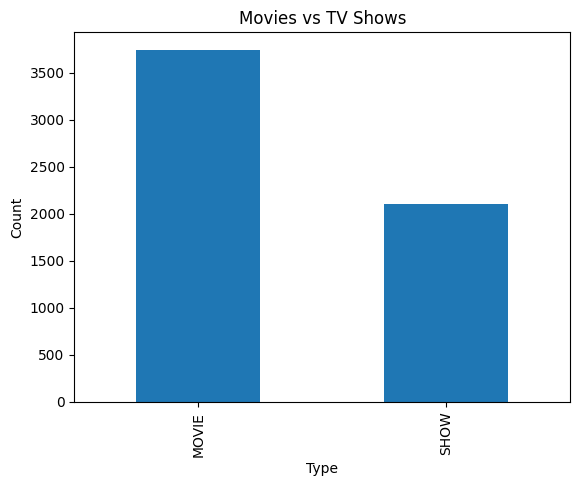

In [ ]:
type_counts = df["type"].value_counts()

type_counts.plot(kind="bar", title="Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

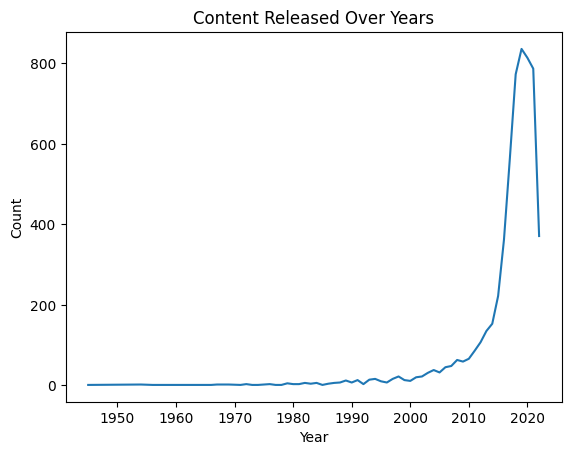

In [ ]:
yearly_counts = df["year"].value_counts().sort_index()

yearly_counts.plot(title="Content Released Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

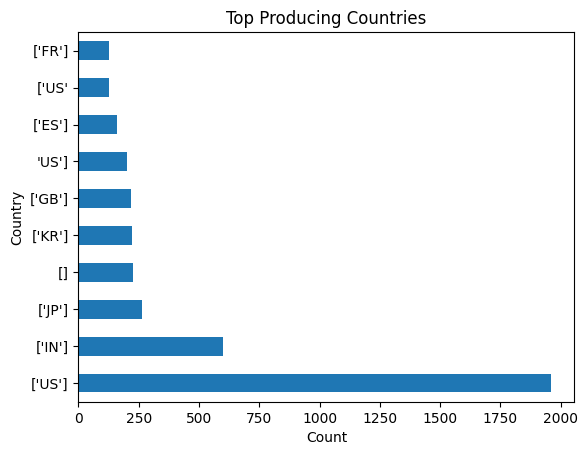

In [ ]:
country_counts = (
    df["production_countries"]
    .dropna()
    .str.split(", ")
    .explode()
    .value_counts()
    .head(10)
)

country_counts.plot(kind="barh", title="Top Producing Countries")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

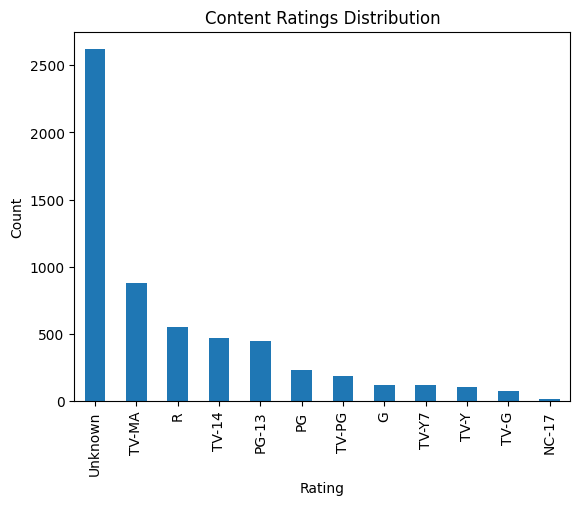

In [ ]:
rating_counts = df["age_rating"].value_counts()

rating_counts.plot(kind="bar", title="Content Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

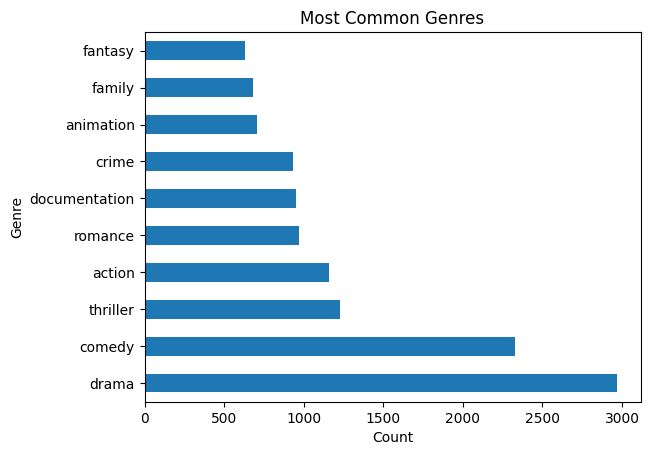

In [ ]:
genre_counts = (
    df["genres"]
    .dropna()
    .str.split(", ")
    .explode()
    .value_counts()
    .head(10)
)

genre_counts.plot(kind="barh", title="Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

## Key Insights

- Movies dominate Netflix’s catalog compared to TV Shows.
- Content additions increased sharply after 2016, reflecting platform expansion.
- The United States and India are the top content-producing countries.
- TV-MA is the most frequent rating, indicating a mature audience focus.
- Dramas and International Movies are the most common genres.


